In [1]:

import numpy as np

from qiskit import QuantumCircuit, assemble, transpile


In [2]:
def dj_funcion(parameter1, parameter2, nquibit):
    
    n = 0
    n2 = 0
    
    b_str = [None] * (2 * nquibit)
    
    while (n<nquibit):
        
        if(parameter1 == 1):
            b_str[n2] = "0"
            n2= n2+1
        else:
            b_str[n2] = "1"
            n2= n2+1
        
        if(parameter2 == 1):
            b_str[n2] = "0"
            n2= n2+1
        else:
            b_str[n2] = "1"
            n2= n2+1
        n = n+1    
    return b_str

In [5]:
def dj_oracle(b_str):
    
    if b_str[0] == b_str[1]:
        case = 'constant'
    else:
        case = 'balanced'
    
    nquibit = len(b_str)
    
    oracle_qc = QuantumCircuit(nquibit+1)
    
    if case == "balanced":
        
        for qubit in range(nquibit):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        
        oracle_qc.barrier()
        
        for qubit in range(nquibit):
            oracle_qc.cx(qubit, nquibit)
        
        oracle_qc.barrier()
        
        for qubit in range(nquibit):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    if case == "constant":
        
        for qubit in range(nquibit):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    
    n=nquibit
    
    dj_circuit = QuantumCircuit(n+1, n)

    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.x(n)
    dj_circuit.h(n)

    dj_circuit += oracle_qc

    for qubit in range(n):
        dj_circuit.h(qubit)
        
    dj_circuit.barrier()

    for i in range(n):
        dj_circuit.measure(i, i)
    
    
    return dj_circuit


/tmp/ipykernel_359/2241841604.py:45: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += oracle_qc


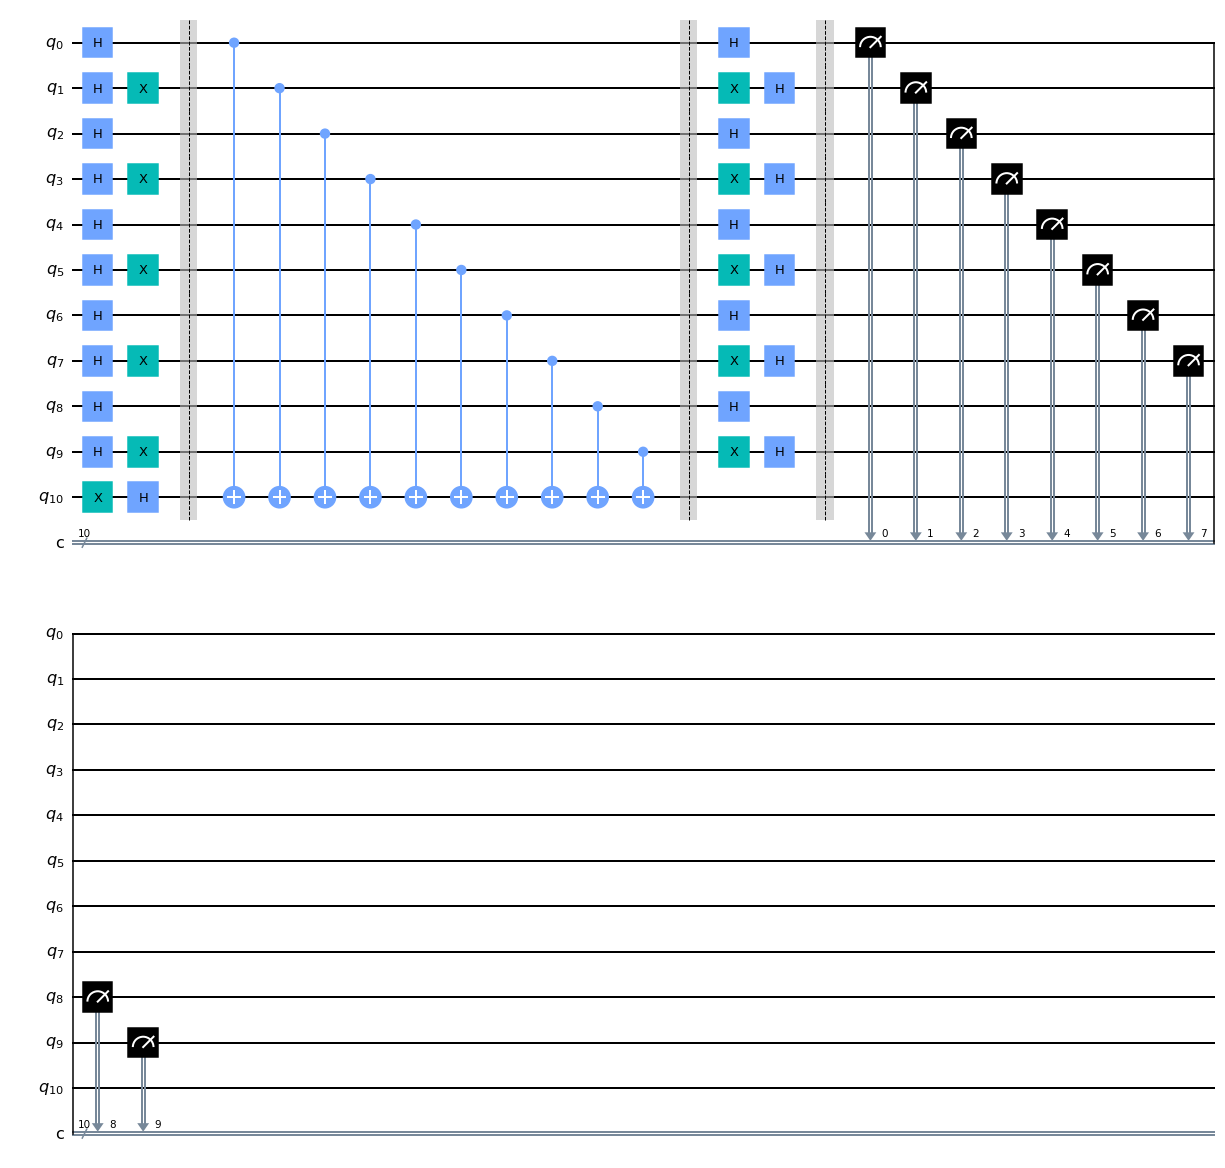

In [6]:
b_str = dj_funcion(1, 0, 5)
oracle=dj_oracle(b_str)
oracle.draw()

